
# Partie 1 (Lavoie)

5,6) toydataset + lr + epochs + graphs: loss curve/epoch + accuracy curve/epoch
7) 5 + 6 IRIS + lr + epochs + graphs: loss curve/epoch + accuracy curve/epoch
9)10)11) IRIS + 3 architectures 

# Partie 2 (Lacerte)

replace loss by cross_entropy

train MLP w/ IRIS
graphs: loss curve/epoch + accuracy curve/epoch

compare perfs MSE vs CE (graphs+text)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# classifier for toy dataset
def toy_nearest(val):
  ret = []
  for v in val:
    if (v>=0.5):
      ret.append(1)
    else:
      ret.append(0)
  return ret

# classifier for iris dataset
def iris_nearest(val):
  ret = []
  for v in val:
    if (v<0.5):
      ret.append(0)
    elif (v<1.5):
      ret.append(1)
    else:
      ret.append(2)    
  return ret


In [0]:
class LinearB():
    def __init__(self, n_in, n_out, lr=0.1):
        self.W = np.random.random((n_out, n_in))
        self.b = np.random.random((n_out, 1))
        self.lr = lr

    def forward(self, x):
        self.x = x
        out = np.dot(self.W, x) + self.b
        return out

    def backward(self, dy):
        return np.dot(self.W.T, dy)

    def update(self, dy):
        dw = np.dot(dy, self.x.T)
        db = np.dot(dy, np.ones((dy.shape[1], 1)))
        self.W = self.W - self.lr*dw
        self.b = self.b - self.lr*db
    
    def setlr(self,lr):
        self.lr = lr
        

class ReLU():
    def __init__(self):
        pass

    def forward(self, x):
        self.x = x
        return np.maximum(0, x)

    def backward(self, dy):
        x = self.x
        x[x<=0] = 0
        x[x>0] = 1
        return dy * x

class MSE():
    def __init__(self):
        pass

    def forward(self, yp, yd):
        loss = np.sum((yd - yp)**2)
        loss = loss / yd.reshape(-1).shape[0]
        return loss

    def backward(self, yp, yd):
        #Assume that yp and yd has form (1, num_of_samples)
        n = float(yd.shape[1])
        dx = (1/n) * (yp - yd)
        return dx

class Perceptron():
    def __init__(self, n_in, n_out, lr=0.1):
        self.linear = LinearB(n_in, n_out, lr)
        self.relu = ReLU()
        self.n_in = n_in
        pass

    def forward(self, x):
        net = self.linear.forward(x)
        out = self.relu.forward(net)
        return out

    def backward(self, dy):
        dnet = self.relu.backward(dy)
        dx = self.linear.backward(dnet)
        return dx
    
    def update(self, dy):
        self.linear.update(dy)
        
    def setlr(self, lr):
        self.linear.setlr(lr)


In [0]:

class MLP():
    def __init__(self, liste_de_perceptrons, lr):
        # Sauvegarde la liste de perceptrons et lr dans l'objet
        self._perceptrons = liste_de_perceptrons
        for p in self._perceptrons:
            p.setlr(lr)
        self._lr = lr
    
    def forward(self, x):
        # forward de MLP
        y = self._perceptrons[0].forward(x)
        for p in self._perceptrons[1::]:
            y = p.forward(y)
        return y

    
    def backward(self, dy):
        # backward de MLP
        dx = self._perceptrons[-1].backward(dy)
        for p in self._perceptrons[-2::-1]:
            dx = p.backward(dx)
        return dx
    
    def update(self, dy):
        # Updates de MLP
        dx = self._perceptrons[-1].backward(dy)
        self._perceptrons[-1].update(dy)
        for p in self._perceptrons[-2::-1]:
            dx2 = p.backward(dx)
            p.update(dx)
            dx = dx2


In [0]:
def run_epochs_toy(perceptrons, X_train, Y_train, X_val, Y_val, epochs=20, batchsize=8, lr=0.01):
  loss = MSE()
  mlp = MLP(perceptrons, lr)
  loss_v = []
  accuracy_v = []
  nbatches=int(X_train.shape[1]/batchsize)
  X_train_batch = np.split(X_train,nbatches,axis=1)
  Y_train_batch = np.split(Y_train,nbatches,axis=1)
  for epoch in range(epochs):
      loss_e = []
      for b in range(nbatches):
        yp=mlp.forward(X_train_batch[b])
        loss_e.append(loss.forward(yp,Y_train_batch[b]))
        dy = loss.backward(yp,Y_train_batch[b])
        mlp.update(dy)
      loss_v.append((np.average(loss_e)))
      yv = mlp.forward(X_val)
      accuracy_v.append((np.sum(toy_nearest(yv[0])==Y_val[0]))/Y_val[0].size)

  plt.plot(np.arange(epochs), loss_v)
  plt.title("loss/epoch lr=%f final loss=%f epochs=%i" % (lr, loss_v[epochs-1],epochs))
  plt.show()
  plt.plot(np.arange(epochs), accuracy_v)
  plt.title("accuracy/epoch lr=%f final accuracy=%f" % (lr, accuracy_v[epochs-1]))
  plt.show()
  

In [0]:
toy_dataset = np.load("toy_dataset_updated.npy")
x = np.load("toy_dataset_updated.npy")[:,[0,1]].T
y = np.load("toy_dataset_updated.npy")[:,[2]].T

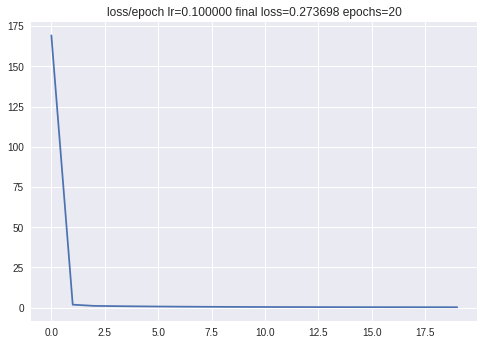

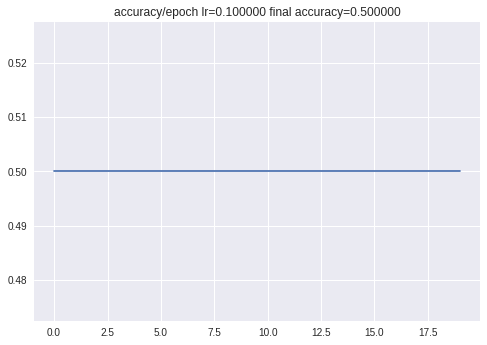

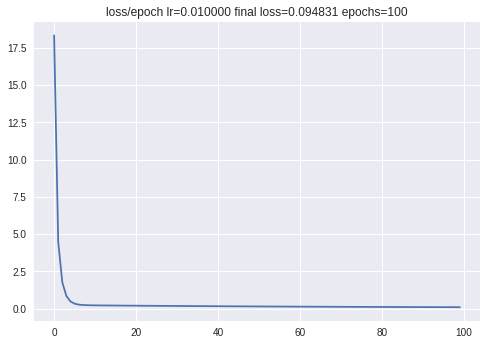

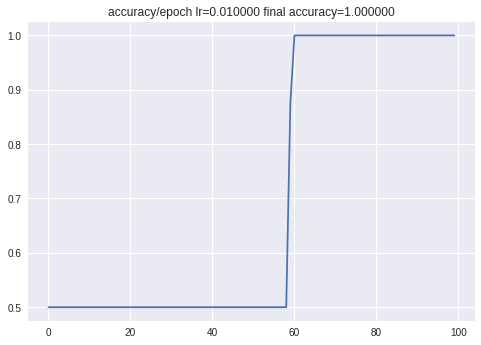

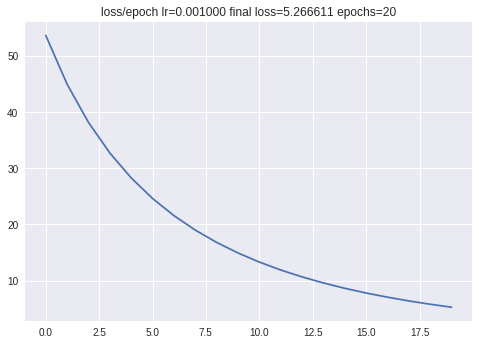

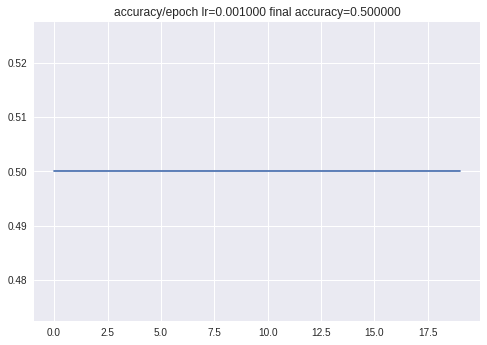

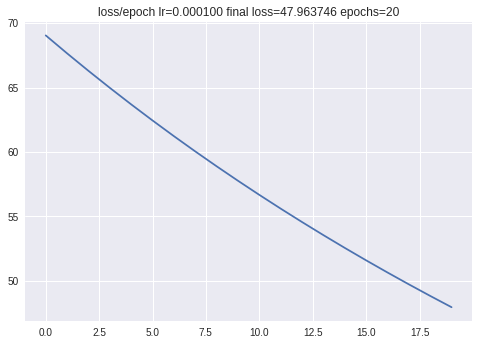

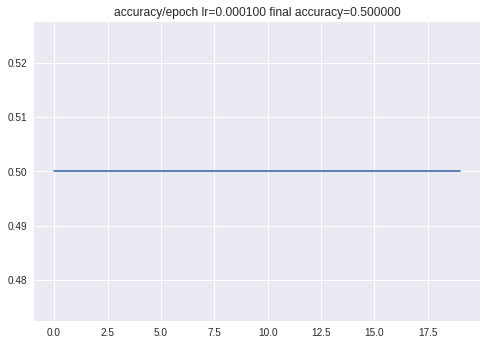

In [172]:
perceptrons = [Perceptron(2,4), Perceptron(4,4), LinearB(4,1)]
run_epochs_toy(perceptrons, x, y, x, y, lr=0.1)

perceptrons = [Perceptron(2,4), Perceptron(4,4), LinearB(4,1)]
run_epochs_toy(perceptrons, x, y, x, y, lr=0.01,epochs=100)

perceptrons = [Perceptron(2,4), Perceptron(4,4), LinearB(4,1)]
run_epochs_toy(perceptrons, x, y, x, y, lr=0.001)

perceptrons = [Perceptron(2,4), Perceptron(4,4), LinearB(4,1)]
run_epochs_toy(perceptrons, x, y, x, y, lr=0.0001)

# perceptrons = [Perceptron(2,4), Perceptron(4,4), LinearB(4,1)]
# mlp = MLP(perceptrons, 0.01)
# loss = MSE()
# loss_v = []
# accuracy_v = []
# epochs = 100
# for epocs in range(epochs):
#     yp=mlp.forward(x)
#     loss_v.append(loss.forward(yp,y))
#     accuracy_v.append((np.sum(toy_nearest(yp[0])==y[0]))/y[0].size)
#     dy = loss.backward(yp,y)
#     mlp.update(dy)

# plt.plot(np.arange(epochs), loss_v)
# plt.title("loss/epoch")
# plt.show()
# plt.plot(np.arange(epochs), accuracy_v)
# plt.title("accuracy/epoch")
# plt.show()


In [0]:
def run_epochs_iris(perceptrons, X_train, Y_train, X_val, Y_val, epochs=20, batchsize=10, lr=0.01):
  loss = MSE()
  mlp = MLP(perceptrons, lr)
  loss_v = []
  accuracy_v = []
  nbatches=int(X_train.shape[1]/batchsize)
  for epoch in range(epochs):
    loss_e = []
    X_train_batch = np.split(X_train,nbatches,axis=1)
    Y_train_batch = np.split(Y_train,nbatches,axis=1)
    for b in range(nbatches):
      yp=mlp.forward(X_train_batch[b])
      loss_e.append(loss.forward(yp,Y_train_batch[b]))
      dy = loss.backward(yp,Y_train_batch[b])
      mlp.update(dy)
    loss_v.append((np.average(loss_e)))
    yv = mlp.forward(X_val)
    accuracy_v.append((np.sum(iris_nearest(yv[0])==Y_val[0]))/Y_val[0].size)
    # shuffle dataset
    XY_train = np.concatenate((X_train, Y_train), axis=0)
    np.random.shuffle(XY_train.T)
    X_train = XY_train[[0,1,2,3],:]
    Y_train = XY_train[[4],:]

  plt.plot(np.arange(epochs), loss_v)
  plt.title("loss/epoch lr=%f final loss=%f" % (lr, loss_v[epochs-1]))
  plt.show()
  plt.plot(np.arange(epochs), accuracy_v)
  plt.title("accuracy/epoch lr=%f" %lr)
  plt.show()
  

(4, 100)
(1, 100)
(4, 50)
(1, 50)


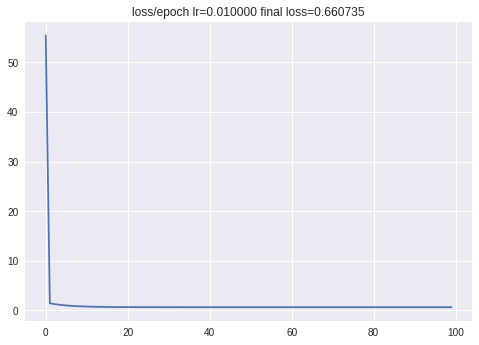

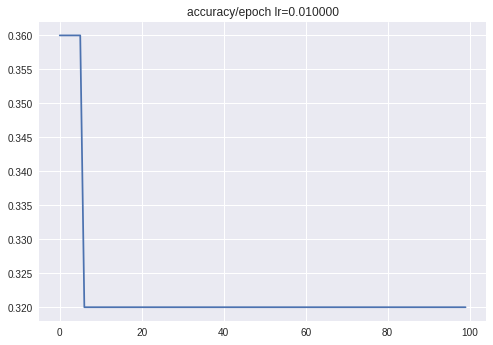

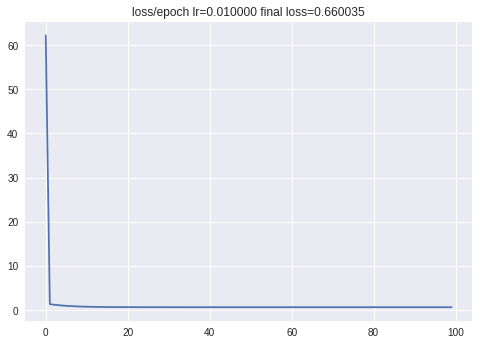

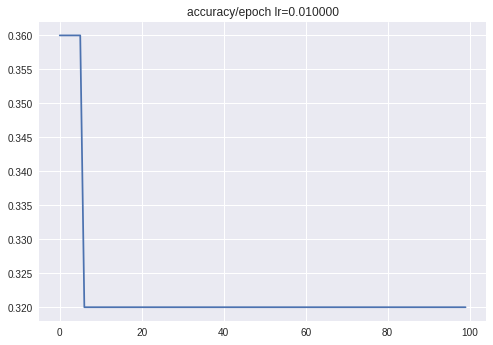

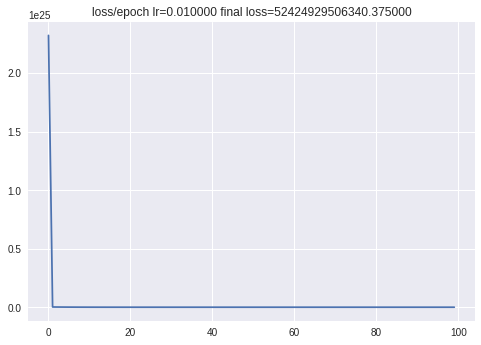

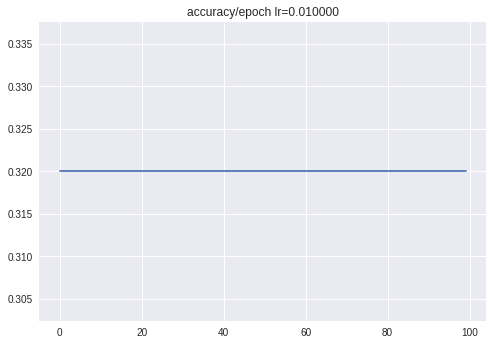

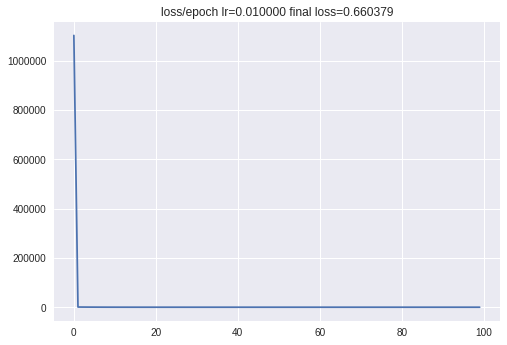

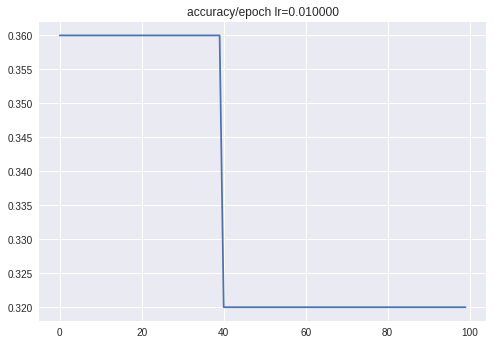

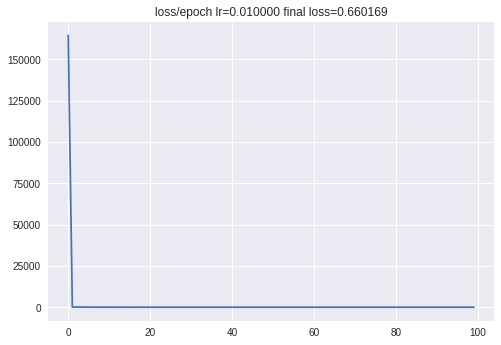

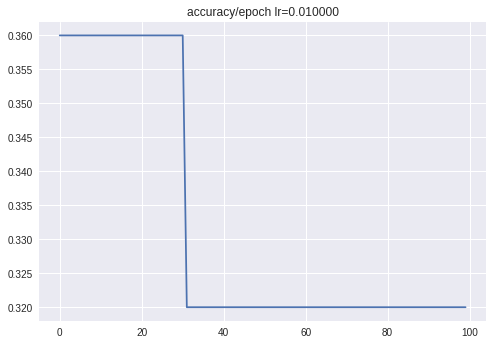

In [174]:
# IRIS data
X = np.load("train_data.npy").reshape(4, 100)
Y = np.load("train_target.npy").reshape(1, 100)
print (X.shape)
print (Y.shape)
X_test = np.load("test_data.npy").reshape(4, 50)
Y_test = np.load("test_target.npy").reshape(1, 50)
print (X_test.shape)
print (Y_test.shape)

# IRIS architecture 1

perceptrons = [Perceptron(4,5), Perceptron(5,5), LinearB(5,1)]
run_epochs_iris(perceptrons, X, Y, X_test, Y_test, lr=0.01, batchsize=10, epochs=100)

# IRIS architecture 2

perceptrons = [Perceptron(4,5), Perceptron(5,5), LinearB(5,1)]
run_epochs_iris(perceptrons, X, Y, X_test, Y_test, lr=0.01, batchsize=10, epochs=100)

# IRIS architecture 3

perceptrons = [Perceptron(4,5), Perceptron(5,5), Perceptron(5,5), Perceptron(5,5), LinearB(5,1)]
run_epochs_iris(perceptrons, X, Y, X_test, Y_test, lr=0.01, batchsize=10, epochs=100)

perceptrons = [Perceptron(4,10), Perceptron(10,10), Perceptron(10,10), Perceptron(10,10), LinearB(10,1)]
run_epochs_iris(perceptrons, X, Y, X_test, Y_test, lr=0.01, batchsize=10, epochs=100)

perceptrons = [Perceptron(4,7), Perceptron(7,7), Perceptron(7,7), Perceptron(7,7), LinearB(7,1)]
run_epochs_iris(perceptrons, X, Y, X_test, Y_test, lr=0.01, batchsize=10, epochs=100)

# perceptrons = [Perceptron(4,5), Perceptron(5,5), LinearB(5,1)]
# mlp = MLP(perceptrons, 0.01)
# loss = MSE()
# loss_v = []
# accuracy_v = []
# epochs = 100
# for epocs in range(epochs):
#     yp=mlp.forward(X)
#     loss_v.append(loss.forward(yp,Y))
#     dy = loss.backward(yp,Y)
#     mlp.update(dy)
#     yv=mlp.forward(X_test)
#     accuracy_v.append((np.sum(iris_nearest(yv[0])==Y_test[0]))/Y_test[0].size)

# print(yp)
# print(Y)
# print(iris_nearest(yp[0]))

# plt.plot(np.arange(epochs), loss_v)
# plt.title("loss/epoch")
# plt.show()
# plt.plot(np.arange(epochs), accuracy_v)
# plt.title("accuracy/epoch")
# plt.show()

